# Activity 5 Proposed Solution

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')

# print top 5 rows of the data
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
# find total cases
data['Total'] = data.Confirmed + data.Recovered + data.Deaths

In [4]:
# group the data by country so that we can get country-wise total cases till current day.
country_wise_total = data.groupby('Country')['Total'].sum().to_frame().reset_index()

# display top 5 rows of data
country_wise_total.head()

,Country,Total
0,Afghanistan,8957917
1,Albania,1864656
2,Algeria,8935695
3,Andorra,428172
4,Angola,500779


In [5]:
# sort the data in descending order of the total cases
country_wise_total.sort_values('Total', ascending= False, inplace= True)

# display top 5 rows of the data
country_wise_total.head()

,Country,Total
175,US,1081644754
23,Brazil,829463512
79,India,806024375
140,Russia,242367788
134,Peru,139672741


To make the Pie Chart, I will consider top 10 countries having most number of Total cases. And the rest of the countries will be represented collectively by the name: **Rest of World**

In [6]:
# calculate total cases in rest of the countries
rest_of_world = sum(country_wise_total.Total[10:])

In [7]:
# append the rest of world data to top 10 countries
final_data = country_wise_total.iloc[:10].append({'Country': 'Rest of World', 'Total': rest_of_world}, ignore_index= True)

### Plotting the Chart

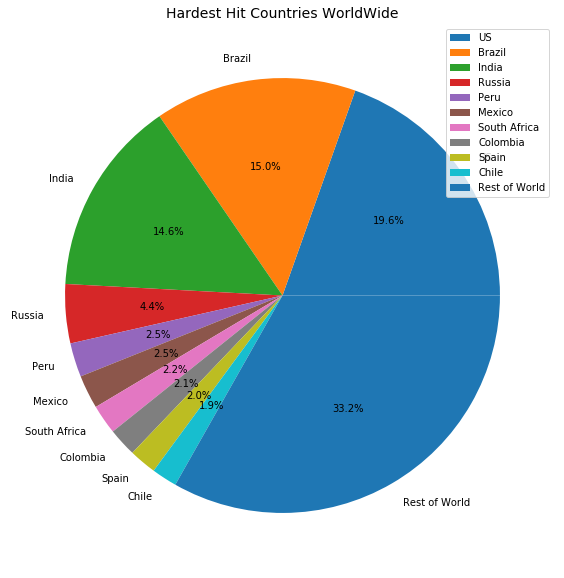

In [8]:
# set the plot size
plt.rcParams['figure.figsize'] = 10, 10
# plot the pie chart
plt.pie(final_data.Total, labels= final_data.Country, autopct='%.1f%%')
# make the legend
plt.legend()
# set the title of the chart
plt.title('Hardest Hit Countries WorldWide', fontsize= 14)
# display the chart
plt.show()